# Projeto Física Estatística

## Modelo de Ising: Algoritmo Metrópolis

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import random
import warnings
warnings.filterwarnings("ignore")

#### Funções

In [24]:
def Exp(site_state, N): #np.ndarray + provável para 1 
    return np.random.choice(site_state, (N, N), p=[0.3, 0.7]) 

In [25]:
def soma_viz(i, j, state, N):
    return state[(i-1)%N, j] + state[(i+1)%N, j] + state[i, (j-1)%N] + state[i, (j+1)%N]

In [26]:
def dE(i, j, J, state, N): # precisa ser 2 para ser comparado a Onsager
    #Diferença de energia com o spin troca na posição sorteada
    return -2*J*soma_viz(i, j, state, N)*(state[i, j]*-1)

In [27]:
def Metropolis(J, T, state, N): #mudei essa função
                                      
    #Sorteio e troco o spin do sítio
    i, j = np.random.randint(0, N, size=2)
    spin = state[i, j]
 
    r = np.random.uniform(0, 1)
    
    delta = dE(i, j, J, state, N)

    if delta < 0: #Eold é maior (Enew < Eold)
        state[i, j] = spin*-1
        return state

    elif r < np.exp(-delta/(T)):
        state[i, j] = spin*-1
        return state

    return state

In [28]:
def magnetiza(state):
    return abs(np.sum(state))

###  1. Magnetização Vs. Temperatura para $J$ diferente

### Parâmetros

In [29]:
N = 64 #número de sítios N^2
site_state = [-1,1] #possibilidades de spin do sítio
J = [0, -1, 0.5, 1, 2] #intensidade de interação entre spin viz

### Onsager

#### Condições

In [30]:
Tana = np.linspace(0, 8, 200)
Mana = np.zeros(Tana.size)

### Simulação Monte Carlo

#### Condições

In [31]:
T = np.linspace(0.2, 8, 32) # Kelvin = J/Boltzmann(J/K)
M = np.zeros(T.size)
Eq = 150 #passo para o Eq -> média da medida
Med = 100 #vez em que meço magnetização

### Sistema

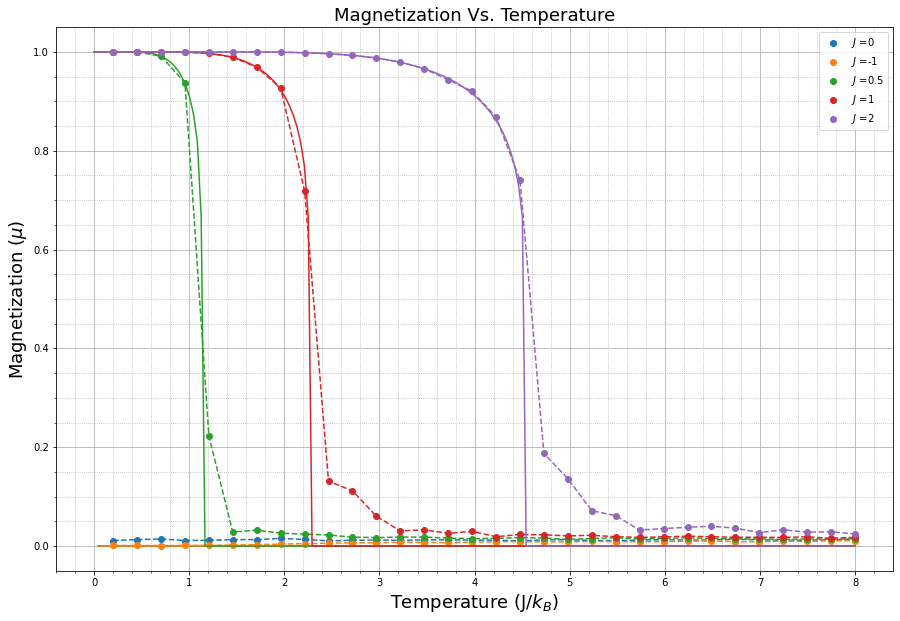

In [32]:
fig, ax = plt.subplots(figsize=(15,10))

n = 1/(Med*(N*N))

for p,d in enumerate(J): #casa vetor, valor na casa -> Interação
        
    for t,u in enumerate(T): #Temperatura
                  
        mag = 0        
        state = Exp(site_state, N)
                   
        for h in range(Eq): #Equilíbrio
        
            for j in range(N*N): #Intervalo entre Medidas (MC)

                state = Metropolis(d, u, state, N) 
            
        for l in range(Med): #Quant. de Medidas

            for g in range(N*N): #Intervalo entre Medidas (MC)
                    
                state = Metropolis(d, u, state, N) 
                      
            Mag = magnetiza(state)
            mag = mag + Mag   
                
        M[t] = mag*n
    
    #Interpola
    f2 = interp1d(T, abs(M), kind='cubic')
    
    #Onsager
    for x, y in enumerate(Tana):
        if y <= 2*d/(np.log(1 + np.sqrt(2))): #J/kb
            Mana[x] = (1-(np.sinh(2*d/y))**(-4))**(1/8)              
    
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(T, abs(M), 'o', label='$J$ ='+str(d), color = color) 
    plt.plot(T, f2(T), '--', color =  color)
    plt.plot(Tana, Mana, '-', color = color)
        
plt.title(label='Magnetization Vs. Temperature', fontsize=18)
plt.legend(loc='best')
plt.ylabel('Magnetization ($\mu$)', fontsize=18)
plt.xlabel('Temperature (J/$k_{B}$)', fontsize=18)
ax.set_axisbelow(True)
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-')
# Customize the minor grid
ax.grid(which='minor', linestyle=':')

###  2. Temperatura Crítica transição Ferro/Paramagnética

In [13]:
Tc = (J/(np.log(np.sum(1+np.sqrt(2)))))*2 #J/Boltzmann

In [14]:
Tc #J/Boltzmann

array([-2.26918531,  0.        ,  1.13459266,  2.26918531,  4.53837063])

In [15]:
#Primeiro caso J = 0.5
n = (0.98+1.21)/2

In [16]:
n_s = abs(((0.98-Tc[2])+(1.21-Tc[2]))/2)
n_s

0.03959265710651105

In [17]:
#Segundo caso J = 1
n = (2.22+2.43)/2

In [18]:
n_s = abs(((2.22-Tc[3])+(2.43-Tc[3]))/2)
n_s

0.055814685786978124

In [19]:
#Terceiro caso J = 2
n = (4.51+4.78)/2

In [22]:
n_s = abs(((4.51-Tc[4])+(4.78-Tc[4]))/2)
n_s

0.10662937157395591

###  3. Lei de Escala para N (finite size)

### Parâmetros

In [32]:
N = [2, 4, 8, 16, 32, 64] #número de sítios N^2
site_state = [-1,1] #possibilidades de spin do sítio
J = 1 #intensidade de interação entre spin viz

#### Condições

In [33]:
T = np.arange(0.2, 5, 0.1) # Kelvin = J/Boltzmann(J/K)
M = np.zeros(T.size)
Eq = 1000 #passo para o Eq -> média da medida
Med = 10000 #vez em que meço magnetização

### Sistema

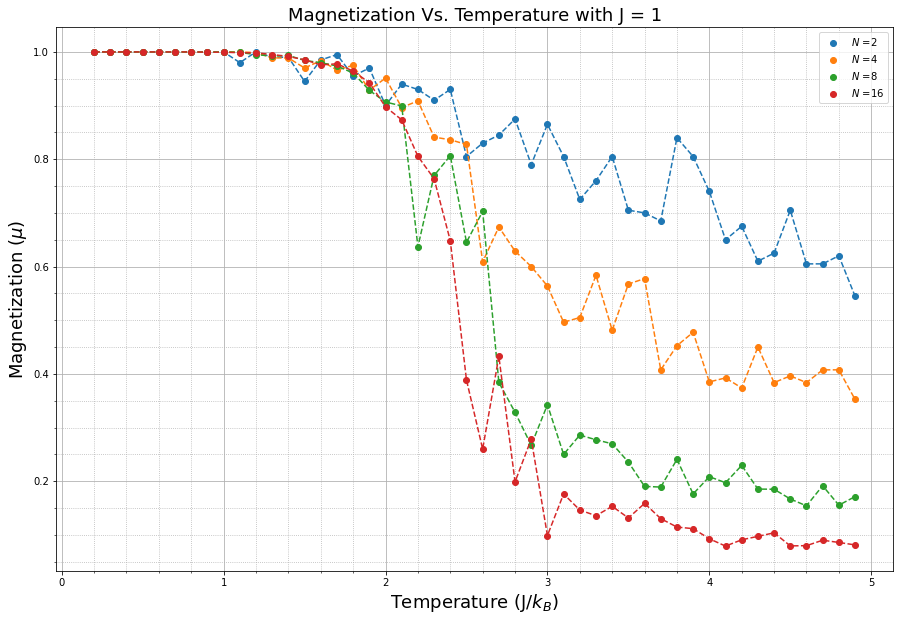

In [36]:
fig, ax = plt.subplots(figsize=(15,10)) 

for p,d in enumerate(N): #casa vetor, valor na casa -> Interação
    
    n = 1/(Med*(d*d))
    
    for t,u in enumerate(T): #Temperatura
                  
        mag = 0        
        state = Exp(site_state, d)
                   
        for h in range(Eq): #Equilíbrio
        
            for j in range(d*d): #Intervalo entre Medidas

                state = Metropolis(J, u, state, d) 
            
        for l in range(Med): #Quant. de Medidas

            for g in range(d*d): #Intervalo entre Medidas
                    
                state = Metropolis(J, u, state, d) 
                      
            Mag = magnetiza(state)
            mag = mag + Mag   
                
        M[t] = mag*n
        
    #Interpola
    f2 = interp1d(T, M, kind='cubic')
    
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(T, M, 'o', label='$N$ ='+str(d), color = color)
    plt.plot(T, f2(T), '--', color =  color)
        
plt.title(label='Magnetization Vs. Temperature with J = 1', fontsize=18)
plt.legend(loc='best')
plt.ylabel('Magnetization ($\mu$)', fontsize=18)
plt.xlabel('Temperature (J/$k_{B}$)', fontsize=18)
ax.set_axisbelow(True)
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-')
# Customize the minor grid
ax.grid(which='minor', linestyle=':')